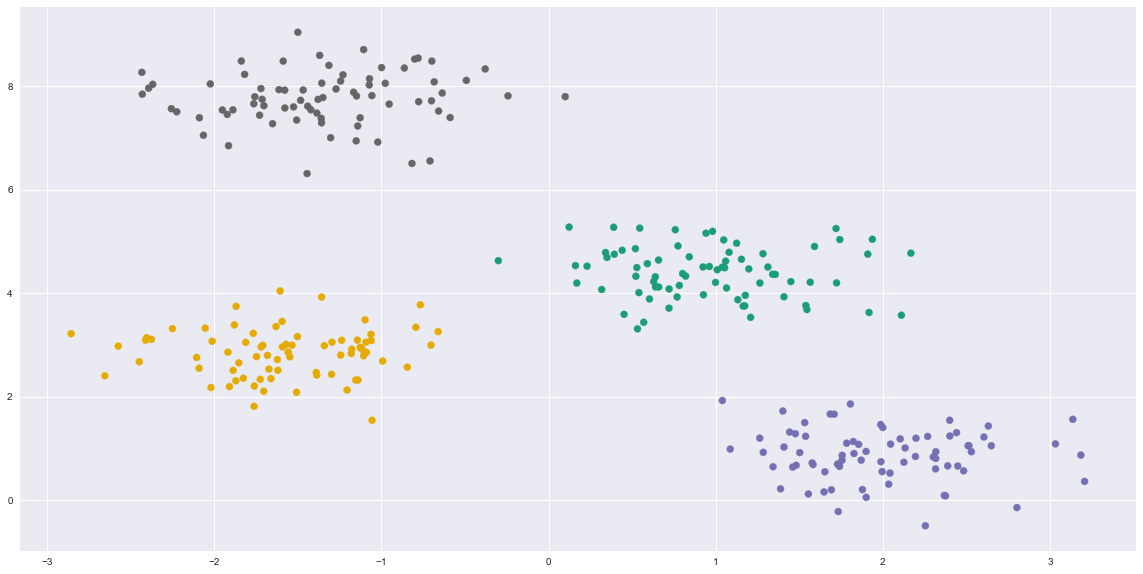

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.5)
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2');

In [2]:
def visualize_classifier(model, X, y, ax=None, cmap='Dark2'):
    plt.figure(figsize=(20,10))
    ax = ax or plt.gca()

    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
    clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, zorder=1)
    ax.set(xlim=xlim, ylim=ylim)    

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from ipywidgets import interact

def f(n_estimators=1):
    tree = DecisionTreeClassifier()
    bag = BaggingClassifier(tree, n_estimators=n_estimators, max_samples=0.8, random_state=1)
    bag.fit(X, y)
    visualize_classifier(bag, X, y)
    
interact(f, n_estimators=(1,20));

A Jupyter Widget

In [4]:
from sklearn.ensemble import RandomForestClassifier
from ipywidgets import interact

def f(n_estimators=1):
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    model.fit(X, y)

    visualize_classifier(model, X, y);
    #plt.savefig('out/random_tree.png', dpi=300)
    
interact(f, n_estimators=(1,200));

A Jupyter Widget